In [1]:
import requests
import numpy as np
import xgboost
import matplotlib.pyplot as plt

In [2]:
id_number = 100002
payload = {'id': id_number}

In [4]:
register = requests.post("http://127.0.0.1:8000/getPrediction", json=payload)  #local API
#register = requests.post("https://scoring-oc7.herokuapp.com/getPrediction", json=payload) # Online version (heroku)

result = register.json()
result

{'Status': 'Success',
 'Prediction': 0,
 'Prediction probabilities': [0.7833455801010132, 0.2166544497013092],
 'User info': {'NAME_CONTRACT_TYPE': {'100002': 'Cash loans'},
  'CODE_GENDER': {'100002': 'M'},
  'FLAG_OWN_CAR': {'100002': 'N'},
  'FLAG_OWN_REALTY': {'100002': 'Y'},
  'CNT_CHILDREN': {'100002': 0},
  'AMT_INCOME_TOTAL': {'100002': 202500.0},
  'AMT_CREDIT': {'100002': 406597.5},
  'AMT_ANNUITY': {'100002': 24700.5},
  'AMT_GOODS_PRICE': {'100002': 351000.0},
  'NAME_INCOME_TYPE': {'100002': 'Working'},
  'NAME_EDUCATION_TYPE': {'100002': 'Secondary / secondary special'},
  'NAME_FAMILY_STATUS': {'100002': 'Single / not married'},
  'NAME_HOUSING_TYPE': {'100002': 'House / apartment'},
  'DAYS_BIRTH': {'100002': -9461},
  'DAYS_EMPLOYED': {'100002': 637},
  'FLAG_MOBIL': {'100002': 1},
  'FLAG_EMAIL': {'100002': 0},
  'CNT_FAM_MEMBERS': {'100002': 1.0},
  'ORGANIZATION_TYPE': {'100002': 'Business Entity Type 3'},
  'INCOME_CREDIT_RATE': {'100002': 0.4980355265342261},
  'A

In [5]:
result['Explainer map']

{'Feature_idx': [10, 8, 0, 1, 2, 9],
 'Scaled_value': [-0.08733533334038233,
  -0.072851725191843,
  -0.07080739032217168,
  -0.0676530208565422,
  -0.060171182325699964,
  -0.03503800242858194]}

In [6]:
result['Explainer list']

[['NAME_EDUCATION_TYPE=Secondary / secondary special', -0.08733533334038233],
 ['243000.00 < AMT_GOODS_PRICE <= 450000.00', -0.072851725191843],
 ['NAME_CONTRACT_TYPE=Cash loans', -0.07080739032217168],
 ['CODE_GENDER=M', -0.0676530208565422],
 ['FLAG_OWN_CAR=N', -0.060171182325699964],
 ['NAME_INCOME_TYPE=Working', -0.03503800242858194]]

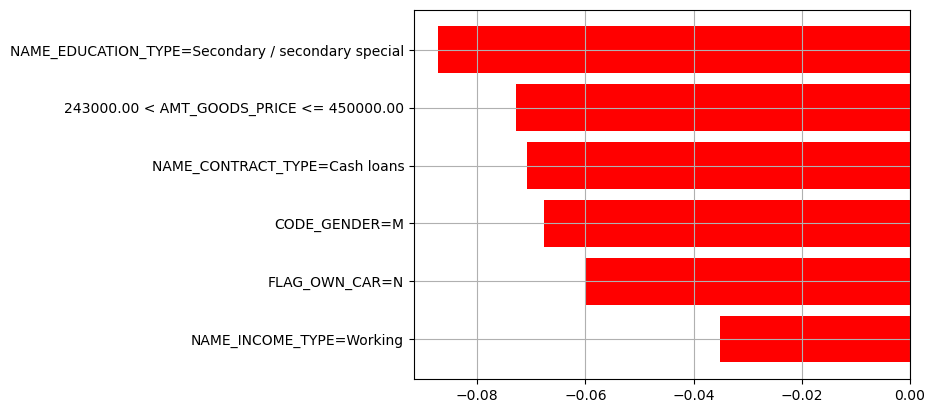

In [7]:
feature_list = [i for i in result['User info']]
names = []
colors = []

for i in result['Explainer list']:
    names.append(i[0])

for i in range(len(result['Explainer map']['Feature_idx'])):
#     names.append(feature_list[result['Explainer list'][i][0]])
    colors.append('green' if result['Explainer map']['Scaled_value'][i] > 0 else 'red')
values = [i for i in result['Explainer map']['Scaled_value']]


names.reverse()
values.reverse()
colors.reverse()

#print(names)

plt.barh(range(len(names)), values, tick_label=names, color=colors)

plt.grid()
plt.show()